In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Generate Data

In [3]:
X_train = np.linspace(-1, 1, 20)

In [4]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445,  0.00135, -0.2006,  0.07475,
                    -0.1422,  0.06515,  0.15265,  0.3521,  0.28415,
                    0.5524,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055,  0.24595, -0.21425, -0.0286,
                   0.23415,  0.46575, 0.07955,  0.1973,  0.0719,
                   0.3639,  0.5536,  0.3365, 0.50705,  0.33435])

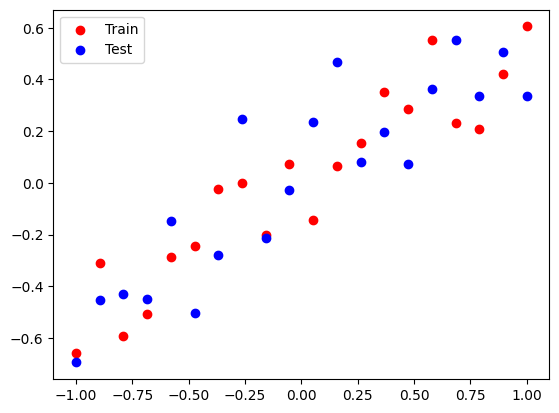

In [7]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [8]:

model_1 = Sequential()


model_1.add(Dense(128, input_dim=1, activation="relu"))

model_1.add(Dense(128, activation="relu"))

model_1.add(Dense(1, activation="linear"))


adam = Adam(learning_rate=0.001)


model_1.compile(optimizer=adam, loss='mse',  metrics=['mse'])


history = model_1.fit(X_train, y_train, epochs=500,

                      validation_data=(X_test, y_test),

                      verbose=False)

In [9]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

# We can see that the model is overfitting the training data.

Train: 0.009324491024017334, Test: 0.03694268688559532


In [10]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 93ms/step


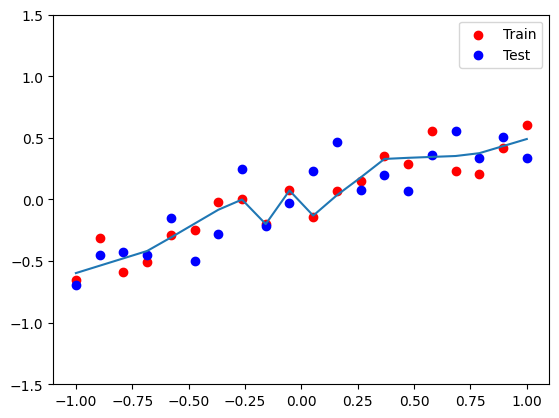

In [11]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

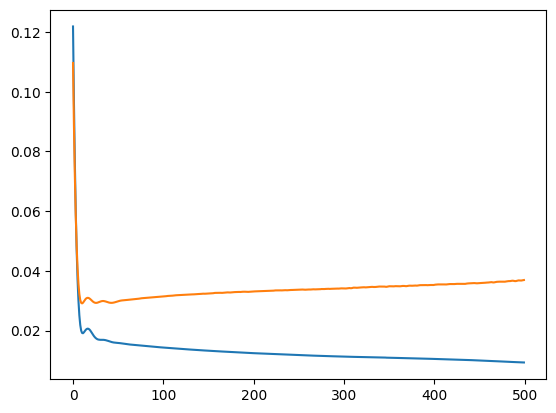

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

# Dropout Model

In [13]:
model_2 = Sequential()

model_2.add(Dense(128, input_dim=1, activation="relu"))
# add dropout layer to reduce overfitting
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
# add dropout layer to reduce overfitting
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               256       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data=(X_test, y_test),
                               verbose=False)

In [15]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

# overfitting has been reduced significantly.

Train: 0.01211283914744854, Test: 0.03689202666282654


In [16]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 44ms/step


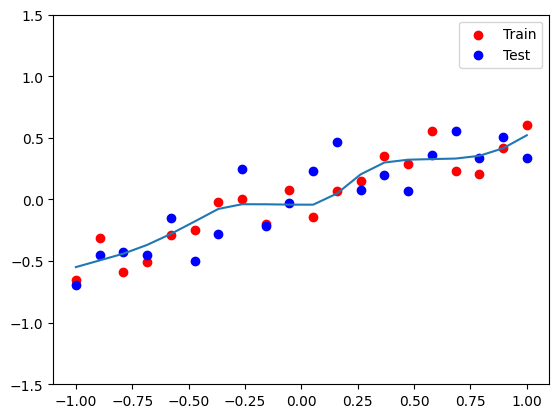

In [17]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# you can observe that regression curve is much smoother than the previous one.

In [19]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim=1, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)

model_3.compile(loss='mse',
                optimizer=adam,
                metrics=['mse']
                )
history = model_3.fit(X_train, y_train, epochs=500,
                      validation_data=(X_test, y_test),
                      verbose=False)

In [20]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

# overfitting has been reduced significantly.

Train: 0.01211283914744854, Test: 0.03689202666282654


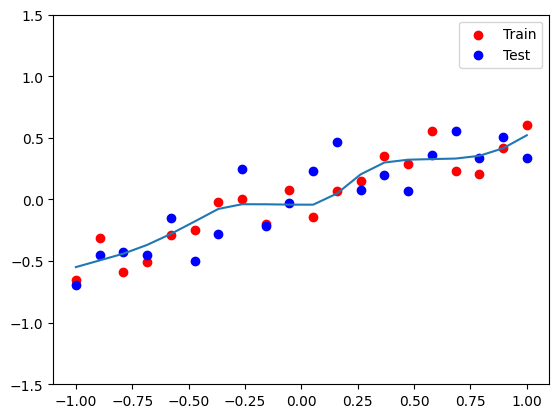

In [21]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()